In [1]:
import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras import layers
import torch
import matplotlib.pyplot as plt
from scipy import stats
from functools import partial
%matplotlib inline
import numpy as np
from tensorflow.keras.layers import Input, Dense, Concatenate, Add
from tensorflow.keras import Model
from tensorflow.keras import regularizers
import time 

In [2]:
def cart(x,y): #
    temp = np.zeros([x.shape[0]*y.shape[0],x.shape[1]+y.shape[1]])
    #num1 = y.shape[1]
    j=0
    num2 = x.shape[0]
    num1 = x.shape[1]
    for i in range(temp.shape[0]):
        if i!=0 and i%num2 == 0:
            j+=1
        temp[i,0:num1] = x[i%num2]
        temp[i,num1::] = y[j]
    return temp

In [3]:
n1=250
x1 = np.linspace(-np.pi/6,np.pi/6,n1).reshape(n1,1)
xt = cart(x1,x1)
print(xt.shape)

(62500, 2)


In [4]:

x1 = np.linspace(-np.pi/15,np.pi/15,n1).reshape(n1,1)
xinit = cart(x1,x1)
print(xinit.shape)

(62500, 2)


In [5]:
x1s = np.linspace(-np.pi/4,-np.pi/6,n1).reshape(n1,1)
x2s = np.linspace(np.pi/6,np.pi/4,n1).reshape(n1,1)
x1 = np.concatenate((x1s,x2s))
xuns = cart(x1,x1)
print(xuns.shape)

(250000, 2)


In [6]:
xt

array([[-0.52359878, -0.52359878],
       [-0.51939316, -0.52359878],
       [-0.51518755, -0.52359878],
       ...,
       [ 0.51518755,  0.52359878],
       [ 0.51939316,  0.52359878],
       [ 0.52359878,  0.52359878]])

In [7]:
#Controller
model = tf.keras.Sequential()
model.add(layers.Dense(100, use_bias=True, activation = 'relu',input_shape=(2,),kernel_regularizer=regularizers.L1(0.01)))
model.add(layers.Dense(200, use_bias=True, activation = 'relu',kernel_regularizer=regularizers.L1(0.01)))
model.add(layers.Dense(200, use_bias=True, activation = 'relu',kernel_regularizer=regularizers.L1(0.01)))
model.add(layers.Dense(200, use_bias=True, activation = 'relu',kernel_regularizer=regularizers.L1(0.01)))
model.add(layers.Dense(200, use_bias=True, activation = 'relu',kernel_regularizer=regularizers.L1(0.01)))
model.add(layers.Dense(200, use_bias=True, activation = 'relu',kernel_regularizer=regularizers.L1(0.01)))
model.add(layers.Dense(1,use_bias=True, activation='linear'))
#model.add(tf.keras.layers.Lambda(lambda x: x * 100))

In [ ]:
#Barrier
modelb = tf.keras.Sequential()
modelb.add(layers.Dense(50, use_bias=True, activation = 'relu',input_shape=(2,),kernel_regularizer=regularizers.L1(0.01)))
modelb.add(layers.Dense(50, use_bias=True, activation = 'relu',kernel_regularizer=regularizers.L1(0.01)))
modelb.add(layers.Dense(200, use_bias=True, activation = 'relu',kernel_regularizer=regularizers.L1(0.01)))
modelb.add(layers.Dense(200, use_bias=True, activation = 'relu',kernel_regularizer=regularizers.L1(0.01)))
modelb.add(layers.Dense(50, use_bias=True, activation = 'relu',kernel_regularizer=regularizers.L1(0.01)))
modelb.add(layers.Dense(50, use_bias=True, activation = 'relu',kernel_regularizer=regularizers.L1(0.01)))
modelb.add(layers.Dense(1,use_bias=True, activation='linear'))
#model.add(tf.keras.layers.Lambda(lambda x: x * 100))

In [9]:
opt1 = tf.keras.optimizers.Adam(1e-6)

In [10]:
def check1(xt,y_3,y_next,etac):
    ind1 = np.where(y_3<=0)[0]
    #ind1 = tf.experimental.numpy.where(y_3<=0)[0].numpy()
    
    #tf.experimental.numpy.where(y_next-y_3<0)[0].numpy()
    #ind2 = tf.experimental.numpy.where(y_next-y_3>-etac)[0].numpy()
    ind2 = np.where(((y_next-y_3)>-etac) )[0]
    ind4 = np.where((np.abs(xt[:,0])>0.1)|(np.abs(xt[:,1])>0.1))[0]
    #ind4 = tf.experimental.numpy.where(y_next-y_3<0)[0].numpy()
    
    ind3 = np.intersect1d(ind1,ind2)
    ind5 = np.intersect1d(ind3,ind4)
    
    return ind5

In [11]:
def check2(xt,y_3,y_next,etac):
    ind1 = np.where(y_3<=0)[0]
    
    
    
    ind2 = ind2 = np.where(((y_next-y_3)>-etac) )[0]
    ind4 = np.where((np.abs(xt[:,0])>0.1)|(np.abs(xt[:,1])>0.1))[0]
    
    
    ind3 = np.intersect1d(ind1,ind2)
    ind5 = np.intersect1d(ind3,ind4)
    
    return ind5

In [12]:
opt1 = tf.keras.optimizers.Adam(1e-5)
opt2 = tf.keras.optimizers.Adam(5e-6)

In [13]:
epochs = 5000000
eta = 0.1
eps = 0.03
tau = tf.constant(0.01)
er1 = 1
er2 = 1
er3 =1
y_1=1
y_2=1
y_3=1
y_next= 10
l3=[]
l3.append(np.inf)
t1 = time.perf_counter()
te=[2,3]
te2=[2,3]
lr = 1e-6
l_b=0
et = 0.1
l_c=0
for i in range(epochs):
    lipb = 1
    lipc = 1
    for j in range(0,len(modelb.weights),2):
        
        lipb*=np.max(np.abs(modelb.weights[j]))
    for j in range(0,len(model.weights),2):
        
        lipc*=np.max(np.abs(model.weights[j]))
    
    if i !=0:
        #et = 0
        te = check1(xt,y_3,y_next,et)
        te2 = check1(xt,y_3,y_next_c,et)
        tes = check2(xt,y_3,y_next,et)
        
        l3.append(len(te))
        
    else:
        te = [1]
        #te2=[]
        tes =[1]
        l3.append(np.inf)
    
    et = 1.05*lipb*0.004
    if len(tes)<50 and  np.max(y_1)<-et and np.min(y_2)>=et and i!=0:
        break
    if i %50 ==0:
        
        print( lipb,lipc,l_b, l_c)
        print(np.max(y_1),np.min(y_2),len(te),len(tes),er3,min(l3),et)
    with tf.GradientTape() as tape0, tf.GradientTape() as tape1:
        u1 = tf.reshape( model(xt, training=True)[:,0],[xt.shape[0],1])
        #u2 = tf.reshape( model(xt, training=True)[:,1],[xt.shape[0],1])
        y_1 =tf.reshape( modelb(xinit, training=True),[xinit.shape[0],1])
        y_3 = tf.reshape(modelb(xt, training=True),[xt.shape[0],1])
        y_2 = tf.reshape(modelb(xuns, training=True),[xuns.shape[0],1])

        ind1 = np.where(y_1<=0)[0]
        er1 = np.where(y_1>=-et)

        er2 = np.where(y_2<et)

        x1 = tf.reshape(xt[:,0].astype(np.float32),[xt.shape[0],1])
        x2 = tf.reshape(xt[:,1].astype(np.float32),[xt.shape[0],1])

        x1n = x1+ tau*(x2)
        x2n = x2+ tau*(9.8*tf.math.sin(x1) +10*u1)
        xnext = tf.reshape(tf.stack([x1n,x2n],axis=1),xt.shape)
        y_next =tf.reshape( modelb(xnext,training = True),[xnext.shape[0],1])
        if i%1000 ==0:
            y_next_c =tf.reshape( modelb(xnext,training = True),[xnext.shape[0],1])
        
            
        ind2 = np.where((tf.gather(y_next-y_3,np.where(y_3<=0)[0]))>=0)[0]

        l_b =tf.reduce_mean(tf.square(tf.subtract(eta,eta)))
        l_c =tf.reduce_mean(tf.square(tf.subtract(eta,eta)))

        y_nextc = tf.gather(y_next_c,te2)
        y_3c = modelb(xt[te2], training=True)
        try:
            er3 = np.max((tf.gather(y_next-y_3,te)))
            #er3 = tf.norm(tf.gather(xt-xnext,te),ord=np.inf)
        except:
            er3 = 0
        l_b += tf.reduce_mean(tf.square(tf.subtract(y_1,-eta))) +tf.reduce_max(tf.square(tf.subtract(y_1,-eta)))+ tf.reduce_mean(tf.square(tf.subtract(y_2,eta))) +tf.reduce_max(tf.square(tf.subtract(y_2,eta)))  
        l_b += tf.reduce_mean(tf.square(tf.subtract(y_next-y_3,-eta))) +tf.reduce_max(tf.square(tf.subtract(y_next-y_3,-eta)))
        #l_c += tf.reduce_mean(tf.square(tf.subtract(y_nextc-y_3c,-eta))) +tf.reduce_max(tf.square(tf.subtract(y_nextc-y_3c,-eta)))
        if len(tes)>100:
            l_c += tf.reduce_mean(tf.square(tf.subtract(y_next-y_3,-eta))) +tf.reduce_max(tf.square(tf.subtract(y_next-y_3,-eta)))
        else:
            l_c += tf.reduce_mean(tf.square(tf.subtract(y_nextc-y_3c,-eta))) +tf.reduce_max(tf.square(tf.subtract(y_nextc-y_3c,-eta)))
            #l_c+=tf.reduce_max(tf.square(tf.subtract(y_nextc-y_3c,-eta)))
        l_c +=0.2*( tf.reduce_mean(tf.square(tf.subtract(x2n,0))) + tf.reduce_max(tf.square(tf.subtract(x2n,0))))
        #+0.0005* ( tf.reduce_max(tf.square(tf.subtract(x1n,0))) + tf.reduce_max(tf.square(tf.subtract(x1n,0))))
        gradsb = tape0.gradient(l_b,modelb.trainable_variables)
        gradsc = tape1.gradient(l_c,model.trainable_variables)
        cgradb = [tf.clip_by_norm(g, 2)  for g in gradsb]
        cgradc = [tf.clip_by_norm(g, 2)  for g in gradsc]
        opt1.apply_gradients(zip(cgradb,modelb.trainable_variables))
        opt2.apply_gradients(zip(cgradc,model.trainable_variables))
t2 = time.perf_counter()
tot = t2-t1
print(f'Total runtime:{tot}s')

2.019683143405442e-05 1.3263578506721237e-06 0 0
1 1 1 1 1 inf 8.482669202302858e-08
2.0393935325840738e-05 1.3386647545727184e-06 tf.Tensor(0.060782038, shape=(), dtype=float32) tf.Tensor(0.10409403, shape=(), dtype=float32)
0.0029854684 -0.0027603996 7744 7744 0.0012921784 7744 8.565452836853111e-08
2.0636232446927246e-05 1.3527921261371895e-06 tf.Tensor(0.05695237, shape=(), dtype=float32) tf.Tensor(0.103725575, shape=(), dtype=float32)
0.0044392752 0.007974421 1406 1406 0.00041521015 759 8.667217627709444e-08
2.0967076254228563e-05 1.366390828066271e-06 tf.Tensor(0.053647056, shape=(), dtype=float32) tf.Tensor(0.10348947, shape=(), dtype=float32)
0.0036903305 0.015400245 4801 4801 0.000766044 759 8.806172026775997e-08
2.1244155841523878e-05 1.3815572562504952e-06 tf.Tensor(0.05065923, shape=(), dtype=float32) tf.Tensor(0.103179716, shape=(), dtype=float32)
0.0021058857 0.02046306 7790 7790 0.0010759318 759 8.922545453440029e-08
2.1659509654010194e-05 1.3992047662346523e-06 tf.Tenso

In [14]:
xt[check1(xt,y_3,y_next,et)], tf.gather(xnext,check1(xt,y_3,y_next,et))

(array([[ 0.14929925, -0.00630842],
        [ 0.18714976, -0.00630842],
        [ 0.19135538, -0.00630842],
        [ 0.20817783, -0.00630842],
        [ 0.10303751, -0.00210281],
        [ 0.10724312, -0.00210281],
        [ 0.11144874, -0.00210281],
        [ 0.11985996, -0.00210281],
        [ 0.1324768 , -0.00210281],
        [ 0.14509364, -0.00210281],
        [ 0.14929925, -0.00210281],
        [ 0.16191609, -0.00210281],
        [ 0.18714976, -0.00210281],
        [ 0.19135538, -0.00210281],
        [ 0.20397221, -0.00210281],
        [ 0.20817783, -0.00210281],
        [ 0.21658905, -0.00210281],
        [ 0.24182273, -0.00210281],
        [ 0.25023395, -0.00210281],
        [ 0.25864518, -0.00210281],
        [ 0.27546763, -0.00210281],
        [ 0.28387885, -0.00210281],
        [ 0.28808447, -0.00210281],
        [ 0.30490692, -0.00210281],
        [ 0.30911253, -0.00210281],
        [ 0.38060795, -0.00210281],
        [ 0.41845846, -0.00210281],
        [-0.44369214,  0.002

In [15]:
model(xt[check1(xt,np.array(y_3),np.array(y_next),et)])

<tf.Tensor: shape=(49, 1), dtype=float32, numpy=
array([[-0.10516362],
       [-0.14350234],
       [-0.14683188],
       [-0.16211772],
       [-0.11750083],
       [-0.12137216],
       [-0.12479321],
       [-0.13121873],
       [-0.1402956 ],
       [-0.15104708],
       [-0.1548152 ],
       [-0.16827565],
       [-0.19033603],
       [-0.19444793],
       [-0.20568624],
       [-0.20964076],
       [-0.21684213],
       [-0.2393281 ],
       [-0.24624588],
       [-0.2530754 ],
       [-0.26705286],
       [-0.27422684],
       [-0.27713358],
       [-0.291458  ],
       [-0.29430497],
       [-0.35214293],
       [-0.38117808],
       [ 0.39228684],
       [ 0.29227665],
       [ 0.25911486],
       [ 0.25639105],
       [ 0.23142493],
       [ 0.2284464 ],
       [ 0.22539406],
       [ 0.22259513],
       [ 0.21937832],
       [ 0.18711476],
       [-0.17535016],
       [-0.2008782 ],
       [ 0.16344276],
       [ 0.15138179],
       [ 0.14560719],
       [ 0.13964649],
     

In [16]:
check2(xt,np.array(y_3),np.array(y_next),et)

array([30910, 30919, 30920, 30924, 31149, 31150, 31151, 31153, 31156,
       31159, 31160, 31163, 31169, 31170, 31173, 31174, 31176, 31182,
       31184, 31186, 31190, 31192, 31193, 31197, 31198, 31215, 31224,
       31269, 31303, 31315, 31316, 31324, 31325, 31326, 31327, 31328,
       31339, 31401, 31409, 31580, 31584, 31586, 31588, 31592, 31593,
       31594, 31595, 31596, 31844], dtype=int64)

In [17]:
tes

array([30910, 30919, 30920, 30924, 31149, 31150, 31151, 31153, 31156,
       31159, 31160, 31163, 31169, 31170, 31173, 31174, 31176, 31182,
       31184, 31186, 31190, 31192, 31193, 31197, 31198, 31215, 31224,
       31269, 31303, 31315, 31316, 31324, 31325, 31326, 31327, 31328,
       31339, 31401, 31409, 31580, 31584, 31586, 31588, 31592, 31593,
       31594, 31595, 31596, 31844], dtype=int64)

In [18]:
l1=[]
l2=[]
l11=[]
l12=[]
l13=[]
l14=[]
lu=[]
lu11=[]
lu21=[]
lv=[]
labs1=[]
labs2=[]
labs4=[]
lb=[]
x2=np.array((0.2,-0.2),dtype=np.float32).reshape(1,2
                       )
x2s = x2
x1n = x2[0,0]

x2n = x2[0,1]
#x3n = x2[0,1]
#x4n = x2[0,3]
tau = 0.01
for i in range(5000):
    x2 = x2s
    if i!=0:
        x11 = x1n[0,0].reshape(1,1)
        x21 = x2n[0,0].reshape(1,1)
        #x31 = x3n[0,0].reshape(1,1)
        #x41 = x4n[0,0].reshape(1,1)
    else:
        x11 = x1n.reshape(1,1)
        x21 = x2n.reshape(1,1)
        #x31 = x3n.reshape(1,1)
        #x41 = x4n.reshape(1,1)
    
    #inp=model(x2)
    inp=model(x2)
    #x1 = tf.reshape(xts[j,:,2],(1,xts.shape[1]))
    #x2 = tf.reshape(xts[j,:,3],(1,xts.shape[1]))
    lb.append(modelb(x2)[0,0].numpy())
    u1 =tf.reshape(inp[0,0],(1,1)).numpy()
    #u2 =tf.reshape(inp[0,1],(1,1)).numpy()
    lu11.append(u1[0,0])
    #lu21.append(u2[0,0])
    l11.append(x11[0,0])
    
    l12.append(x21[0,0])
    #l13.append(x31[0,0])
    #l14.append(x41[0,0])
    
    x1n = x11+ tau*(x21)
    x2n = x21+ tau*(9.8*np.sin(x11)+10*u1)
    #x3n = x31+ tau*(x41*np.tan(u1))
    #x4n = x41+ tau*(u2)
    #x4n = x41  + tau *(4.0231*np.power(x11,3) -36.551*np.power(x11,2)*x31-4.131*np.power(x21,2)*x31-27.06*np.power(x31,3)-25.115*x11+77.7*x31-31.2*u1+392.2*u2) 
    #x2n = 1.0*x2 + tau *(-3.447*tf.math.pow(alpha*x1,3)+2.35*tf.math.pow(alpha*x1,2)*x3+1.303*tf.math.pow(alpha*x3,2)*x1+3.939*tf.math.pow(alpha*x3,3)+21.52*x1 -5.0*x3+ u1)
    #x2n = 1.0* x2+ tau*(9.8*np.sin(x1)+u1)
    #l13.append(x2n[0,0]+x4n[0,0])
    x2s = np.hstack((x1n,x2n))
    print(u1)
    #print(x11,x21,x31,x41)
    print(x2s)


    

[[1.9628394]]
[[0.198      0.01575351]]
[[-0.397695]]
[[ 0.19815753 -0.00473853]]
[[-0.17054142]]
[[ 0.19811015 -0.00250007]]
[[-0.19594993]]
[[ 0.19808514 -0.00280702]]
[[-0.19214937]]
[[ 0.19805707 -0.00273631]]
[[-0.19302785]]
[[ 0.19802971 -0.00275615]]
[[-0.19266205]]
[[ 0.19800214 -0.00274204]]
[[-0.1925185]]
[[ 0.19797473 -0.00271622]]
[[-0.19313926]]
[[ 0.19794756 -0.00275511]]
[[-0.19266205]]
[[ 0.19792001 -0.00274889]]
[[-0.1928778]]
[[ 0.19789252 -0.00276689]]
[[-0.19271186]]
[[ 0.19786485 -0.00277094]]
[[-0.19277155]]
[[ 0.19783713 -0.00278362]]
[[-0.19222468]]
[[ 0.1978093  -0.00274428]]
[[-0.19276962]]
[[ 0.19778185 -0.0027621 ]]
[[-0.19190864]]
[[ 0.19775422 -0.00269646]]
[[-0.19336665]]
[[ 0.19772725 -0.00277928]]
[[-0.1924069]]
[[ 0.19769946 -0.00276872]]
[[-0.19221495]]
[[ 0.19767177 -0.00274163]]
[[-0.19252113]]
[[ 0.19764435 -0.00274781]]
[[-0.19233714]]
[[ 0.19761688 -0.00273824]]
[[-0.19247013]]
[[ 0.19758949 -0.0027446 ]]
[[-0.19252113]]
[[ 0.19756204 -0.0027587 

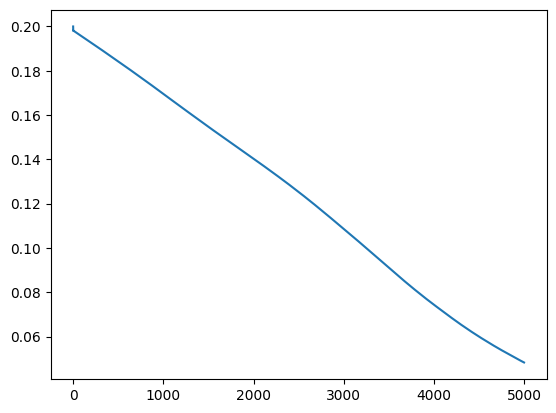

In [19]:
plt.plot(l11)

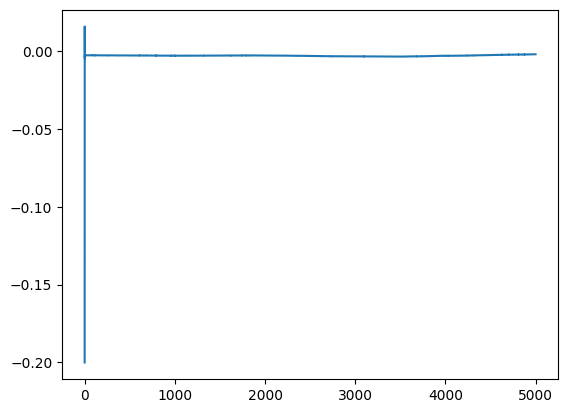

In [20]:
plt.plot(l12)

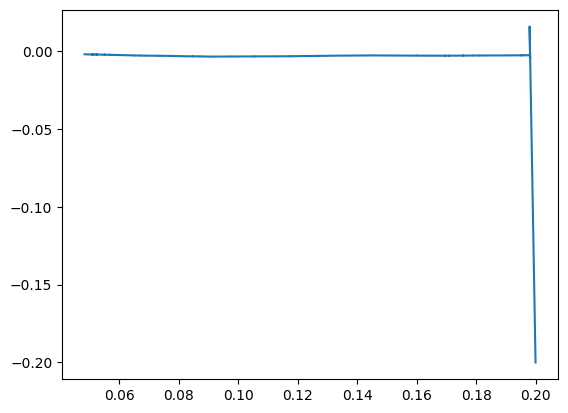

In [21]:
plt.plot(l11,l12)

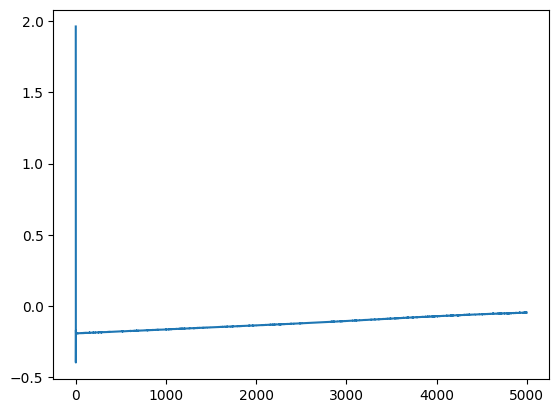

In [22]:
plt.plot(lu11)

In [23]:
lu11[-1]

-0.04730958

In [24]:
inp[0,0]

<tf.Tensor: shape=(), dtype=float32, numpy=-0.04730958>

In [25]:
modelb(np.array(xnext)[tes])-modelb(xt[tes])

<tf.Tensor: shape=(49, 1), dtype=float32, numpy=
array([[ 1.09896064e-05],
       [ 3.06963921e-06],
       [-1.30385160e-06],
       [-1.54972076e-06],
       [ 1.37239695e-05],
       [ 8.17328691e-06],
       [ 5.86360693e-06],
       [-8.18073750e-06],
       [ 1.16974115e-06],
       [-1.13770366e-05],
       [-5.92321157e-06],
       [-1.31949782e-05],
       [-1.81049109e-05],
       [ 1.25765800e-05],
       [ 8.04662704e-07],
       [-1.18464231e-06],
       [ 1.37463212e-05],
       [ 6.22868538e-06],
       [ 4.61935997e-06],
       [ 9.28342342e-06],
       [ 1.10268593e-06],
       [ 2.21282244e-06],
       [ 2.98023224e-07],
       [-3.51071358e-05],
       [ 7.75605440e-06],
       [ 2.02208757e-05],
       [ 1.62422657e-06],
       [-6.28679991e-05],
       [ 1.13248825e-06],
       [-4.74676490e-05],
       [-6.24358654e-06],
       [ 1.22785568e-05],
       [ 1.46627426e-05],
       [ 1.89840794e-05],
       [ 2.31340528e-05],
       [ 1.80155039e-05],
       [-1.9975

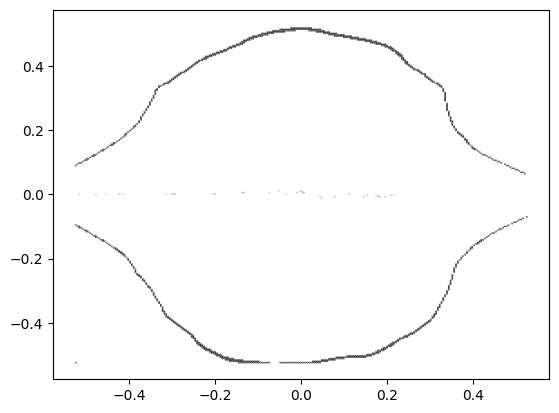

In [45]:
n1=250
x1 = np.linspace(-np.pi/6,np.pi/6,n1).reshape(n1,1)
xt = cart(x1,x1)
#print(xt.shape)
fig = plt.figure()
ax1 = fig.add_subplot(111)
cma = np.ones_like(y_next)
cma2 = np.ones_like(y_next)
ind = np.where(y_next - modelb(xt)>0)
cma[ind[0]] = 0.5
ind21 = np.where(modelb(xt)<=1e-3)
ind22 = np.where(modelb(xt)>-1e-3)
ind2= np.intersect1d(ind21,ind22)
cma2[ind2] = 0
ax1.scatter(xt[:,0], xt[:,1], c=cma, s=0.1) 
ax1.scatter(xt[:,0], xt[:,1], c=cma2, s=0.1)
plt.gray()
plt.show()
#plt.colorbar()

In [46]:
ind

(array([30636, 30885, 30893, 30909, 30917, 30918, 30921, 31011, 31161,
        31166, 31174, 31176, 31252, 31267, 31274, 31276, 31300, 31303,
        31304, 31305, 31326, 31327, 31366, 31401, 31592, 31593, 31607,
        31622, 31625, 31626, 31862, 31874, 31875], dtype=int64),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64))

In [28]:
te

array([30910, 30919, 30920, 30924, 31149, 31150, 31151, 31153, 31156,
       31159, 31160, 31163, 31169, 31170, 31173, 31174, 31176, 31182,
       31184, 31186, 31190, 31192, 31193, 31197, 31198, 31215, 31224,
       31269, 31303, 31315, 31316, 31324, 31325, 31326, 31327, 31328,
       31339, 31401, 31409, 31580, 31584, 31586, 31588, 31592, 31593,
       31594, 31595, 31596, 31844], dtype=int64)

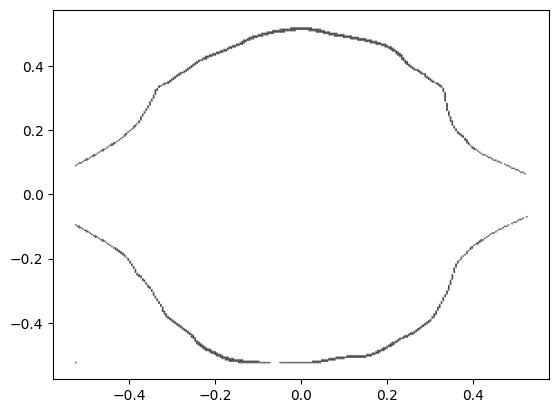

In [29]:
plt.scatter(xt[:,0], xt[:,1], c=cma2, s=0.1)

In [30]:
ind2

array([    0,    90,    91,    92,    93,    94,    95,    96,    97,
          98,    99,   100,   101,   102,   103,   104,   105,   106,
         107,   113,   114,   115,   116,   117,   118,   119,   120,
         121,   122,   123,   124,   125,   126,   127,   128,   129,
         130,   131,   132,   133,   134,   135,   335,   336,   337,
         338,   339,   340,   341,   342,   343,   344,   345,   346,
         347,   348,   349,   350,   351,   381,   382,   383,   384,
         385,   386,   387,   388,   389,   583,   584,   585,   586,
         587,   588,   589,   590,   591,   592,   636,   637,   638,
         639,   640,   641,   642,   643,   831,   832,   833,   834,
         835,   836,   837,   890,   891,   892,   893,   894,   895,
         896,   897,   898,  1080,  1081,  1082,  1083,  1084,  1144,
        1145,  1146,  1147,  1148,  1149,  1150,  1151,  1152,  1153,
        1154,  1155,  1156,  1157,  1158,  1159,  1160,  1328,  1329,
        1330,  1331,

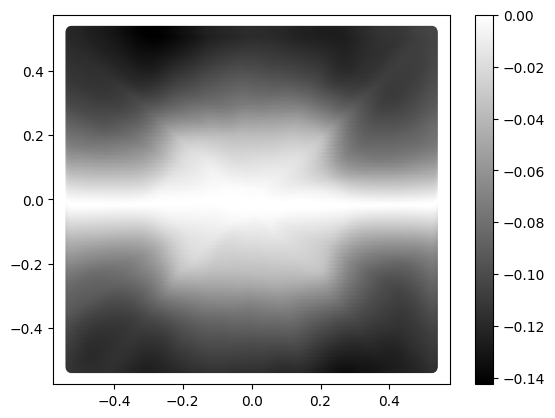

In [31]:
plt.scatter(xt[:,0], xt[:,1], c=y_next-modelb(xt), s=50) # s is a size of marker 
plt.gray()
plt.colorbar()

In [32]:
xnext

<tf.Tensor: shape=(62500, 2), dtype=float32, numpy=
array([[-0.52883476, -0.02977499],
       [-0.5246291 , -0.02972132],
       [-0.52042353, -0.02955058],
       ...,
       [ 0.52042353,  0.02936938],
       [ 0.5246291 ,  0.02931231],
       [ 0.52883476,  0.02934301]], dtype=float32)>

In [33]:
ind2 = np.where(((np.array(y_next)-np.array(y_3))>-eta) )[0]
ind4 = np.where((np.abs(xt[:,0])>0.1)&(np.abs(xt[:,0])>0.1))[0]

In [34]:
ind2

array([ 5098,  5344,  5345, ..., 56620, 56621, 56622], dtype=int64)

In [35]:
ind4

array([    0,     1,     2, ..., 62497, 62498, 62499], dtype=int64)

In [36]:
 ind1 = np.where(y_3<=0)[0]

In [37]:
ind1

array([  100,   101,   102, ..., 61877, 61878, 61879], dtype=int64)

In [38]:
np.max(y_1)

-0.08133367

In [39]:
np.max(y_next-modelb(xt))

6.15567e-05

In [40]:
modelb(xt)[0]

<tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.08818024], dtype=float32)>

In [41]:
y_3.numpy()[0]

array([0.08824693], dtype=float32)

In [42]:
tf.where(y_next-y_3<0)

<tf.Tensor: shape=(62396, 2), dtype=int64, numpy=
array([[    0,     0],
       [    1,     0],
       [    2,     0],
       ...,
       [62497,     0],
       [62498,     0],
       [62499,     0]], dtype=int64)>

In [43]:
tf.experimental.numpy.where(y_next-y_3<0)[0].numpy()

array([    0,     1,     2, ..., 62497, 62498, 62499], dtype=int64)

In [44]:
tf.gather(xt,tf.experimental.numpy.where(tf.abs(xt[:,0])>0.1)[0].numpy())

<tf.Tensor: shape=(50500, 2), dtype=float64, numpy=
array([[-0.52359878, -0.52359878],
       [-0.51939316, -0.52359878],
       [-0.51518755, -0.52359878],
       ...,
       [ 0.51518755,  0.52359878],
       [ 0.51939316,  0.52359878],
       [ 0.52359878,  0.52359878]])>